# MTR/CIS/GCB5350 Intro to Bioinformatics - 2023 - Exam One Key

#### Provide your name below.

## Overview



This Exam will be collected on Monday, October 9th, at 12:00pm ET from CoCalc. 

You will complete your work in this notebook and we will collect (and grade) this version on CoCalc.

Additional time or extensions past the collection time will be considered only in the most extreme or catastrophic of circumstances.

Work on this exam is **on your own**: no collaborative work with any others, and do not share your work with others (i.e., students also taking this exam). Do not use ChatGPT or other AI tools for answers.

**You are free to consult any previous materials for the class and/or online resources to complete the exam.**

You can also ask questions on slack if you run into an issue or need clarification.

**Please do not print whole data frames, instead use the** **`head()`** **or**  **`tail()`** **functions to see what your data looks like.**

### Instructions

Please make sure you illustrate your answer clearly and that the code can be executed and generates the output that you have saved.

This final is composed of 3 parts which cover:

    (I)   Tidyverse and plotitng with ggplot2 (30 points)
    (II)  RNA-Seq analysis (35 points)
    (III) Reading / Understanding Code (35 points)

The corresponding points for each part are provided in the headers for each section and each question is annotated with the number of points it is worth. Note that Part I and II have one question each, while Part III has three questions.

Much of this work can be done using **R**, and we have set the kernel to R as such.

### Part I. Tidyverse and Plotting with ggplot2 (Q1) (30 points total)

* Where indicated, please write the R __code__ used to answer the question.
* After each portion of code, make sure you __execute__ the code to report the result and answer. 
    - To remind you, we have indicated this with the label: **"Code + Result"**


Execute the following cell and their commands to load the tidyverse library and set the plotting dimensions to reasonable sizing for your notebook.

In [1]:
library(tidyverse)
options(repr.plot.width=6, repr.plot.height=6)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.3     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this part, you will be analyzing a dataset of heart and blood measurements taken from patients with and without heart disease. The data is in `heart_disease.txt` and is separated by tabs (`"\t"`).

**Q1a.** [5 points] First, write R code to 

- load this dataset into a variable called `heart`
- use `head()` to print the first 6 rows.

**Code + Result**:

In [3]:
heart <- read.table("heart_disease.txt", header = TRUE)
head(heart)

,Age,Sex,Chest_Pain_Type,Blood_Pressure,Cholesterol,High_Blood_Sugar,Max_Heart_Rate,Exercise_Angina,Heart_Disease
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,70,Male,4,130,322,0,109,0,Presence
2,67,Female,3,115,564,0,160,0,Absence
3,57,Male,2,124,261,0,141,0,Presence
4,64,Male,4,128,263,0,105,1,Absence
5,74,Female,2,120,269,0,121,1,Absence
6,65,Male,4,120,177,0,140,0,Absence


**Q1b.** [5 points] How many individuals in this dataset have heart disease? Write `R` code to find the answer, then type the number in the cell below. (Your `R` code can produce a dataframe or a raw number, but make sure your output includes the answer.)

**Code + Result**:

In [4]:
heart %>% count(Heart_Disease)

# or

heart %>% filter(Heart_Disease == "Presence") %>% nrow()

Heart_Disease,n
<chr>,<int>
Absence,150
Presence,120


[1] 120

**Type your answer here:**

**Q1c.** [5 points] Let's visualize the demographics of our cohort. Use `ggplot` to: 

- make a histogram which shows the distribution of `Age` in this dataset. 
- Use a `facet` to make a separate histogram for male and female individuals.

**Code + Result**:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


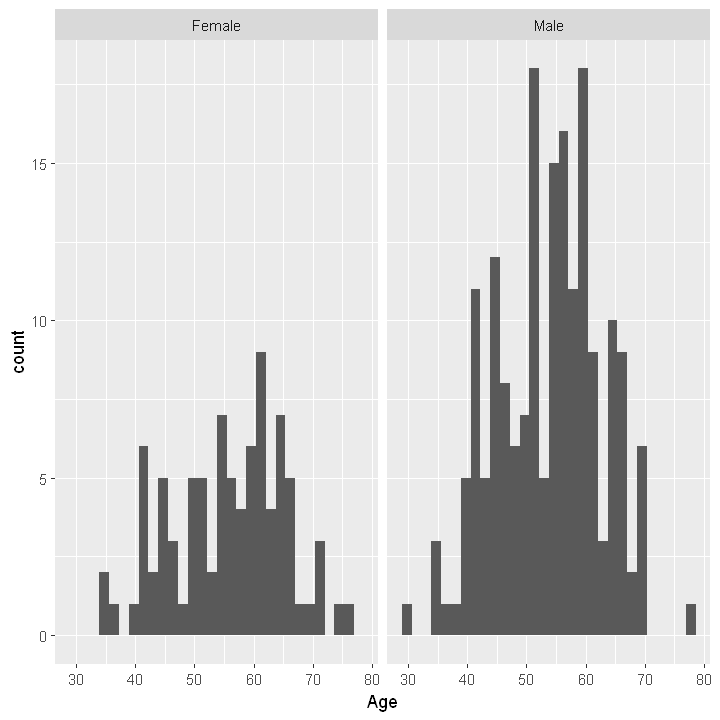

In [5]:
heart %>%
    ggplot(aes(x = Age)) +
    geom_histogram() +
    facet_wrap(~Sex)

**Q1d.** [5 points] Are blood pressure and max heart rate related? Use `ggplot` to: 
- make a scatterplot (points) which relates `Max_Heart_Rate` (x-axis) to `Blood_Pressure` (y-axis). 
- Color each point based on the `Sex` of the individual. 
- Label the x-axis "`Max heart rate`" and the y-axis "`Blood pressure`".

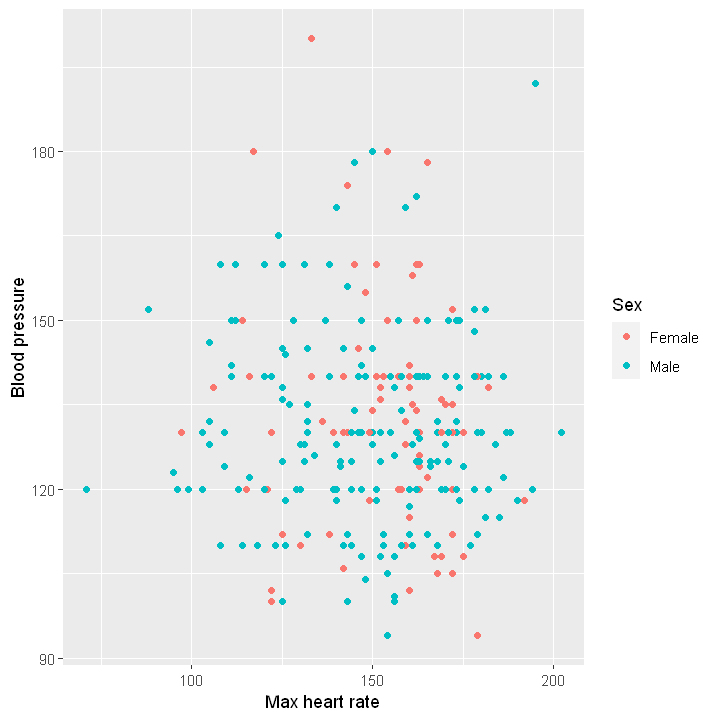

In [6]:
heart %>%
    ggplot(aes(x = Max_Heart_Rate, y  = Blood_Pressure, color = Sex)) +
    geom_point() +
    xlab("Max heart rate") +
    ylab("Blood pressure")

**Q1e.** [5 points] Using `ggplot`:

- make a boxplot which compares the `Cholesterol` distributions between people with heart disease and people without heart disease. 

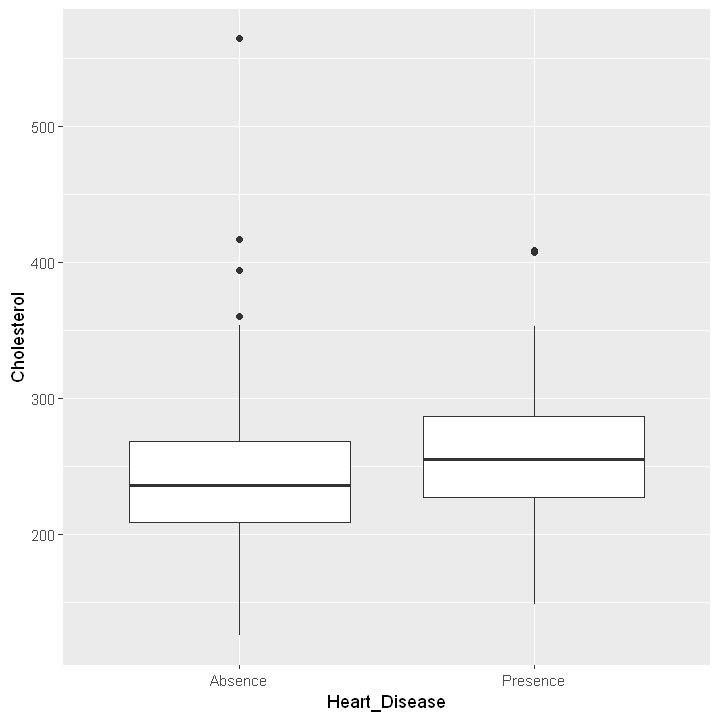

In [7]:
heart %>%
    ggplot(aes(x = Heart_Disease, y = Cholesterol)) +
    geom_boxplot()

**Q1f.** [5 points] Write `R` code to:
* Create a new dataframe called `low_blood_sugar` which contains only individuals where `High_Blood_Sugar` is `0`.
* Using `low_blood_sugar`, calcuate the **median** value of `Cholesterol` for every value of `Chest_Pain_Type` (i.e., your output should have one row for every value of `Chest_Pain_Type`).

In [8]:
low_blood_sugar <- heart %>% filter(High_Blood_Sugar == 0)
low_blood_sugar %>%
    group_by(Chest_Pain_Type) %>%
    summarize(Median_Cholesterol = median(Cholesterol))

Chest_Pain_Type,Median_Cholesterol
<int>,<dbl>
1,231
2,245
3,234
4,251


### Part II. RNA-Seq analysis (Q2) (35 points total)
For this question, you will be analyzing the results of an RNA-seqencing experiment that is attempting to identify the genes whose expression responds to a certain treatment. Similar to the in-class modules, this question will require you to analyze a Summarized Experiment (SE) object that has been provided for you in this folder. It is called `exam1_se.rdata`. Unlike the SE object provided for the in-class module, this object stores the expression of a **bulk RNA-seq** experiment meaning that each column of the count matrix reflects average expression across a pool of cells from a single donor rather than the expression of a single cell. For the experiment donors provided a sample of their cells each of which was then split into two groups. Before sequencing, one of the groups was treated with a stimulant and the other was left untreated. 

**Q2a.** [5 points] Using what you learned in class:

- Read the SE object into cocalc. 
- Report how many **donors** contributed cells to the experiment. (Hint: You will need to load a certain R library to read/manipulate SE objects)

In [2]:
library(SummarizedExperiment)
load("exam1_se.RData")
dim(se)
#There are 10 donors, each of which has provided two pools of cells, 
#a treated and an untreated pool.

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count



Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins

[1] 1000   20

**Q2b.** [5 points] As you'll in the column data for the `se` object, only the treatment has been specified for each column. Before we can run differential expression analyses between the treatment conditions, we need to add the info to the column data. 

- Create a new `donor` label inside the `se` object, and label the donors: `sample_1`, `sample_2`, `sample_3`, ... etc.  Make sure your donor labels match the sample names! 
- Print the contents of the se data to indicate that the donor column has been added

In [3]:
se@colData["donor"] <- paste0("sample_", rep(seq(1,10,1),2))
se@colData

DataFrame with 20 rows and 2 columns
                 Treatment       donor
               <character> <character>
sample_1_untrt       untrt    sample_1
sample_2_untrt       untrt    sample_2
sample_3_untrt       untrt    sample_3
sample_4_untrt       untrt    sample_4
sample_5_untrt       untrt    sample_5
...                    ...         ...
sample_6_trt           trt    sample_6
sample_7_trt           trt    sample_7
sample_8_trt           trt    sample_8
sample_9_trt           trt    sample_9
sample_10_trt          trt   sample_10

**Q2c.** [5 points] Next:

- Read the library that you need to perform your analysis
- Construct a `DESeq2`object from the `se` (SummarizeExperiment) object including comparisons for donor and treatment.
- Conduct a regularized-logarithm (Rlog) transformation of the data 
- Plot the resulting variance-stabilized transformed counts in principal components space. 

converting counts to integer mode

Warning message in DESeqDataSet(se, design = ~donor + Treatment):
"some variables in design formula are characters, converting to factors"


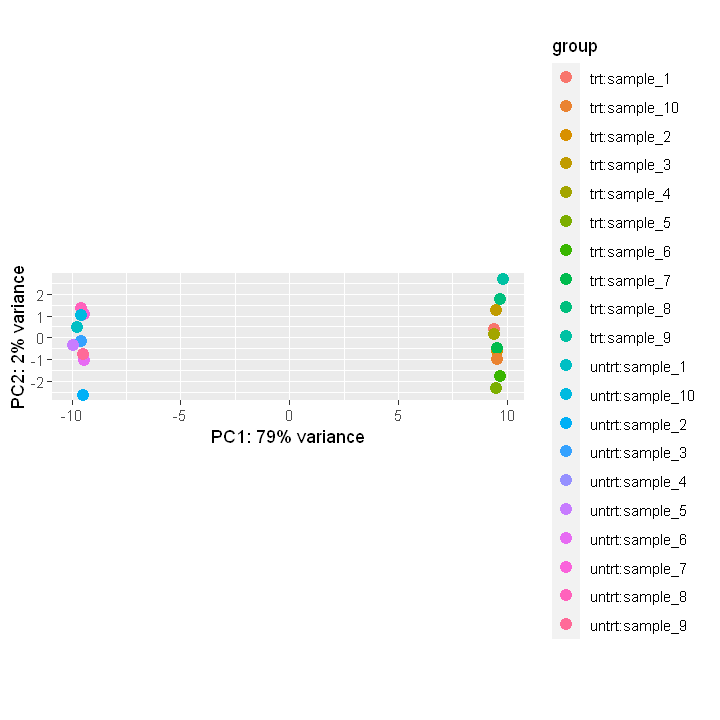

In [4]:
library(DESeq2)
dds <- DESeqDataSet(se, design = ~ donor + Treatment)
rld <- rlog(dds, blind = FALSE)
plotPCA(rld, intgroup = c("Treatment", "donor"))

**Q2d.** [5 points] What type of variation does the first principal component capture? What does this outcome indicate for the experiment's likely success of achieving its central goal?

**Q2e.** [5 points] Write code to perform the following

- Perform a test the genes for differential expression between the treated and untreated samples. 
- Using the default Benjamini-Hochberg correction 
- Report the number of many genes are differentially up-regulated after treatment relative to untreated at a false discovery rate < 0.05
- Report the number of genes that are differentially down-regulated after treatment relative to untreated at a false discovery rate < 0.05  

In [6]:
dds <- DESeq(dds)
res <- results(dds,contrast=c("Treatment","trt","untrt"),tidy=T)
library(tidyverse)
res %>% as_tibble() %>% filter(padj < 0.05) %>% filter(log2FoldChange > 0) %>% nrow()
res %>% as_tibble() %>% filter(padj < 0.05) %>% filter(log2FoldChange < 0) %>% nrow()
#53 genes are upregulated and 52 are downregulated

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



ERROR: Error in padj(., method = "BH"): could not find function "padj"


**Q2f.** [5 points] After learning about multiple-testing corrections, you decided instead that you instead want to apply the more conservative Bonferroni correction for your results:

- Perform a correction on your results based on the bonferroni correction method.
- Report how many genes are up-regulated in treated relative to untreated samples based on the bonferroni adjusted signficance threshold of 0.05 
- Report how many genes are down-regulated in treated realtive to untreated samples based on the bonferroni adjusted signficance threshold of 0.05 
- Create a volcano plot of your results using the Bonferroni p-values and color by the significance

[1] 50

[1] 50

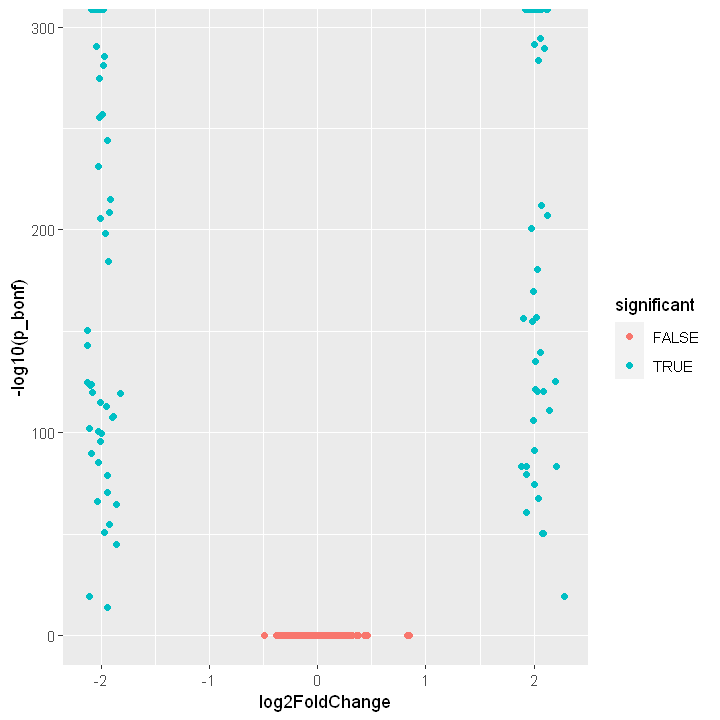

In [26]:
res <- res %>% as_tibble() %>% mutate(p_bonf = p.adjust(pvalue, method = "bonferroni")) %>% mutate(significant = p_bonf < 0.05)
res %>% filter(p_bonf < 0.05) %>% filter(log2FoldChange > 0) %>% nrow()
res %>% filter(p_bonf < 0.05) %>% filter(log2FoldChange < 0) %>% nrow()
library(ggplot2)
ggplot(res,aes(x=log2FoldChange,y=-log10(p_bonf),col=significant)) + geom_point()
#50 genes are upregulated and downregulated using the Bonferroni correction.
#A volcano plot should be exhibited among the results.

**Q2g.** [5 points] Identify the transcript with the greatest `log2FoldChange` up-regulated effect in response to treatment. Using what you've learned about databases, what is the gene symbol for this transcript? What type of transcript is it? I.e. is it a lncRNA, miRNA, pseudogene, protein-coding, etc? 

In [33]:
res[order(res$log2FoldChange, decreasing = TRUE), ][1,]
res %>% arrange(desc(log2FoldChange)) %>% head(n=1)

row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,p_bonf,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
ENST00000515809.1,106.6664,2.276461,0.230634,9.870447,5.59147e-23,5.647949e-22,5.59147e-20,TRUE


row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,p_bonf,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
ENST00000515809.1,106.6664,2.276461,0.230634,9.870447,5.59147e-23,5.647949e-22,5.59147e-20,TRUE


## Part III. Debugging and Correcting Code (Q3-Q5) (35 points total)
For each question, we have provided you with code that has bugs which generate errors or output that is not correct.

--

For each question, your tasks are to:
- a. Describe in words the exact nature of the bug
- b. Provide code which corrects the issue and 'works' (that is, runs and provides the expected output)

--

Notes to consider:
- You are provided the expected result, which you can use to confirm that you have produced the correct output.
- There may be multiple ways to fix the code. As long as your approach is intuitive and functional, you will get credit.
- Feel free to create code blocks to run the code we provide to you line-by-line and add lines to visualize individual outputs as desired.

### Part III - Setup

You do not need to modify anything in the setup section; just make sure to run these cells before continuing to questions 3-5 within Part III.

In [17]:
# Load tidyverse
library(tidyverse)

In questions 1 and 2, we'll be using the DNase dataset. The dataset is loaded from a file and header shown to you below. Documentation for this dataset can be found at: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/DNase.html

Note that one of the columns is slightly different from the documentation due to loading from a file (specifically, the Run column is of type `int`). This should not cause any issues below, and you can assume this column contains variables of this type.

In [18]:
## NOTE - DO NOT PROVIDE TO STUDENTS, only used to make the file to prevent issues with R installs making this not accessible ##
data(DNase)
head(DNase)
write.table(DNase, './DNase_dataset.txt')

,Run,conc,density
,<ord>,<dbl>,<dbl>
1,1,0.04882812,0.017
2,1,0.04882812,0.018
3,1,0.19531250,0.121
4,1,0.19531250,0.124
5,1,0.39062500,0.206
6,1,0.39062500,0.215


In [19]:
# Load DNase dataset for Q1 and Q2
DNase_ds <- read.table('./DNase_dataset.txt')
head(DNase_ds)

,Run,conc,density
,<int>,<dbl>,<dbl>
1,1,0.04882812,0.017
2,1,0.04882812,0.018
3,1,0.19531250,0.121
4,1,0.19531250,0.124
5,1,0.39062500,0.206
6,1,0.39062500,0.215


In question 3, we will use the Theoph dataset. The dataset is loaded from a file and header shown to you below, with documentation found here: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/Theoph.html

Note that one of the columns is slightly different from the documentation due to loading from a file (specifically, the Subject column is of int type). This should not cause any issues below, and you can assume this column contains ints.

In [20]:
## NOTE - DO NOT PROVIDE TO STUDENTS, only used to make the file to prevent issues with R installs making this not accessible ##
## Also because we want to convert a column that breaks things, and loading from file coerces it to int anyways ##
data(Theoph)
head(Theoph)
write.table(Theoph, './Theoph_dataset.txt')

,Subject,Wt,Dose,Time,conc
,<ord>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,79.6,4.02,0.00,0.74
2,1,79.6,4.02,0.25,2.84
3,1,79.6,4.02,0.57,6.57
4,1,79.6,4.02,1.12,10.50
5,1,79.6,4.02,2.02,9.66
6,1,79.6,4.02,3.82,8.58


In [21]:
# Code to create a dataframe with the amount of sample collected for each patient.
## NOTE - DO NOT PROVIDE TO STUDENTS, only used to make the table ##

pt_sample <- data.frame(Subject=c(-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16), sample_volume=c(10,15,15,15,20,10,20,30,10,20,15,10,25,10,20,5,10,30,10,5))
write.table(pt_sample, "./volume_data.txt", sep=',')

In [22]:
# Load Theoph dataset for Q1 and Q2
Theoph_ds <- read.table('./Theoph_dataset.txt')
head(Theoph_ds)

,Subject,Wt,Dose,Time,conc
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,79.6,4.02,0.00,0.74
2,1,79.6,4.02,0.25,2.84
3,1,79.6,4.02,0.57,6.57
4,1,79.6,4.02,1.12,10.50
5,1,79.6,4.02,2.02,9.66
6,1,79.6,4.02,3.82,8.58


### Part III - Q3: Understanding and Fixing Code (Plotting)

Below is some nonfunctional code. The person who wrote it, using the `DNase_ds` dataset, wanted to plot the concentration versus the density, with each point being colored by the run number. They also wanted a purple linear regression line of the same points. An image of what they wanted can be found below the buggy code.


```
# Buggy code
ggplot(DNase_ds) +
    geom_point(aes(x=conc,y=density,color=Run)) +
    geom_smooth(method="lm",color="purple")
```


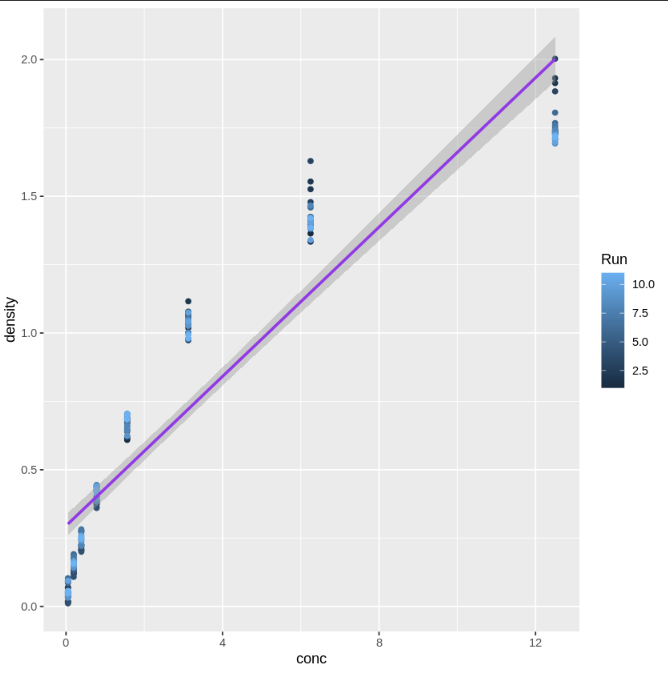

**Q3a.** [5 points] Why does this code not work?

In [ ]:
## KEY - DO NOT PROVIDE TO STUDENTS ##

# The code is not functional because the user failed to define the aesthetic for x and y in the geom_smooth.

**Q3b.** [5 points] Modify this code and fix it below. Make sure to run it to see if you get the image as above.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


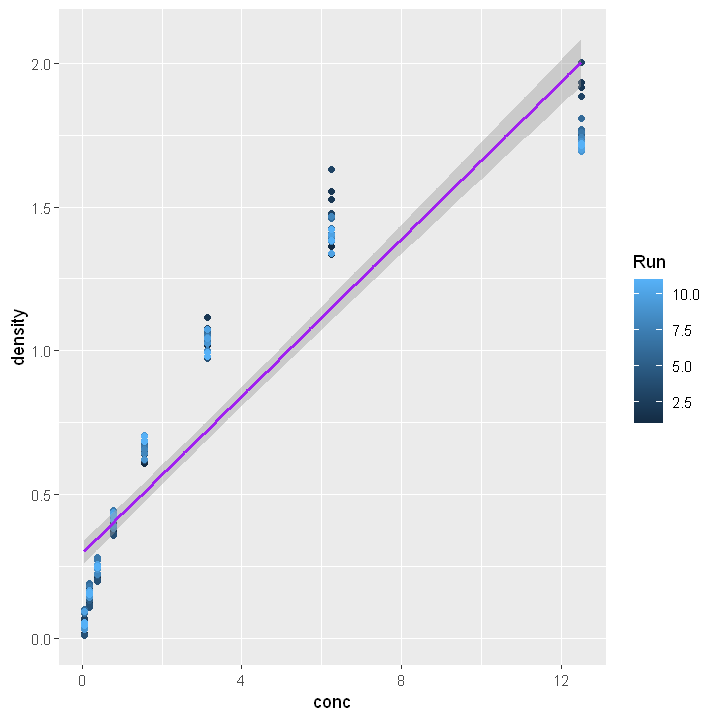

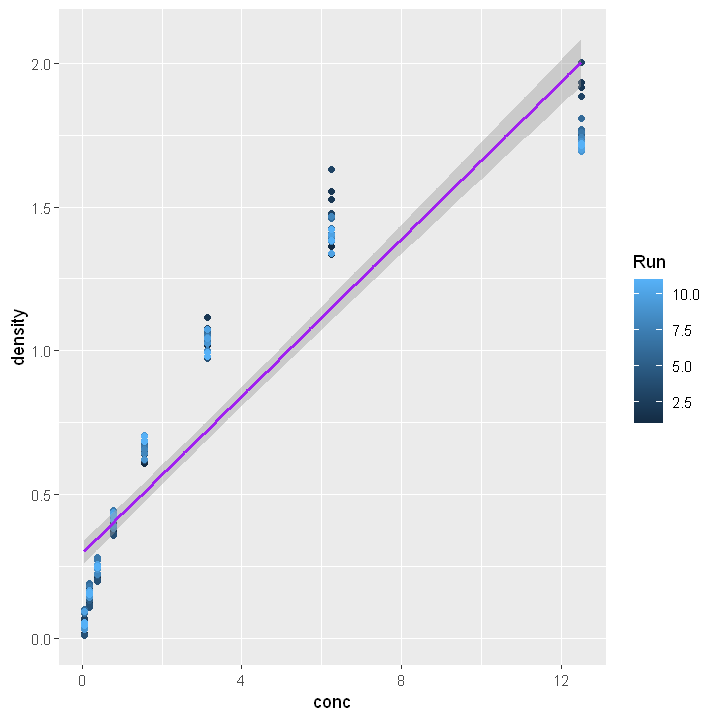

In [23]:
## KEY - DO NOT PROVIDE TO STUDENTS ##

# Fixed code
ggplot(DNase_ds) +
    geom_point(aes(x=conc,y=density,color=Run)) +
    geom_smooth(method="lm",aes(x=conc,y=density),color="purple")

# Alternative, equally acceptable
ggplot(DNase_ds, aes(x=conc,y=density,color=Run)) +
    geom_point() +
    geom_smooth(method="lm",color="purple")

### Part III - Q4: Understanding and Fixing Code (Filtering)

Below is some nonfunctional code. Here, the person who wrote it, using the `DNase_ds` dataset, wanted to get a table that only has the rows from Run 1 or Run 6. An image of what they wanted can be found below the buggy code (showing only the first 20 rows for simplicity). For further confirmation, the final table should have 32 rows in total.

```
# Buggy code
dnase_filt <- DNase_ds %>% filter(Run == 1) %>% filter(Run == 6)
head(dnase_filt, 20)
```



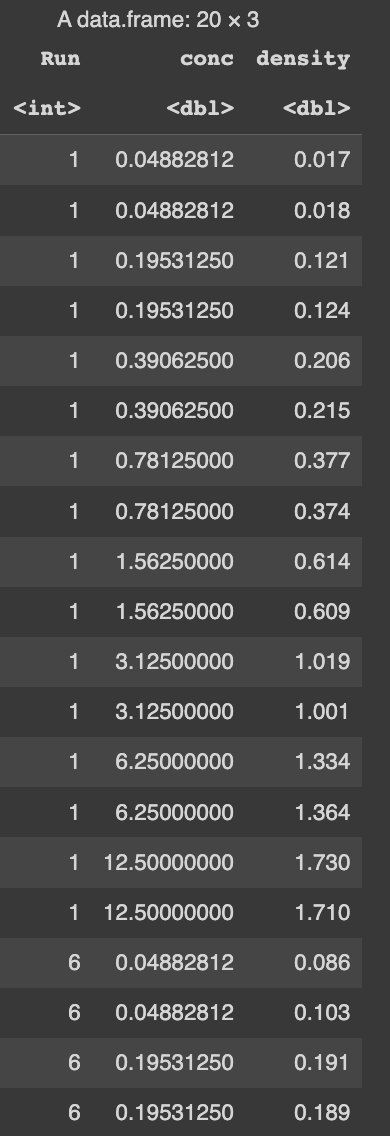

**Q4a.** [5 points] Why does this code not work?

In [ ]:
## KEY - DO NOT PROVIDE TO STUDENTS ##

# The code does not work because the series of operations first filters to only get rows from Run 1, and then filters to get rows from Run 6. As no rows from Run 1 are from Run 6 (by definition), the returned dataframe is empty.

**Q4b.** [5 points] Modify this code and fix it below. Make sure to run it to see if you get the result as above.

In [24]:
## KEY - DO NOT PROVIDE TO STUDENTS ##

# Fixed code
dnase_filt <- DNase_ds %>% filter(Run == 1 | Run == 6)
head(dnase_filt, 20)

,Run,conc,density
,<int>,<dbl>,<dbl>
1,1,0.04882812,0.017
2,1,0.04882812,0.018
3,1,0.19531250,0.121
4,1,0.19531250,0.124
5,1,0.39062500,0.206
6,1,0.39062500,0.215
7,1,0.78125000,0.377
8,1,0.78125000,0.374
9,1,1.56250000,0.614


### Part III - Q5: Understanding and Fixing Code (Multiple issues)

Below is a short block of nonfunctional code with **SEVERAL** issues. In this case, the person has a record with the amount of blood that was drawn from 20 patients in mL (each patient has a different amount of blood drawn) in a file called `volume_data.txt`. They assume that the same amount of blood was drawn at every time point for a given patient.

They want to use these value to get the raw quantity of the drug (in mg) drawn at every time point for each patient that they have data for in the Theoph dataset (note that they have volume data for 20 patients but there are only twelve patients in the Theoph dataset).

Note that the concentration of the drug drawn is in mg/mL. They then want to plot the time against the raw drug quantity drawn, with points colored by patient weight.

They also want the total amount of drug drawn across all samples across all time points added as text to the plot somewhere in the top right (the exact position of this text is not important as long as it is clearly visible, away from any points, and does not skew the axes).


```
# Buggy code
pt_sample <- read.table("./volume_data.txt")
merged_theoph <- left_join(pt_sample, Theoph_ds, by="Subject")
merged_theoph %>% mutate(samp_total=conc*sample_volume)
total_drug <- sum(merged_theoph$samp_total)

ggplot(merged_theoph, aes(x=Time,y=samp_total,color=Wt)) +
    geom_point() +
    geom_text(aes(label=total_drug), color='red')
```



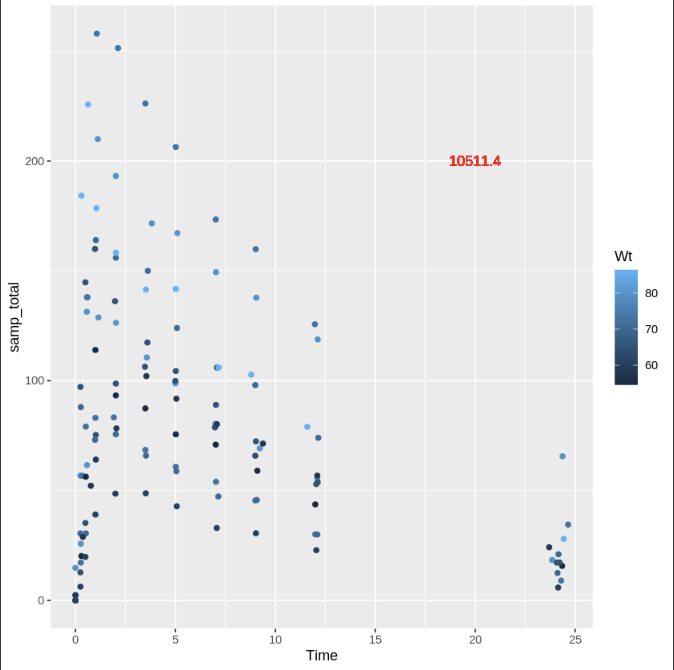

**Q5a.** [10 points] Why does this code not work? There are multiple issues with this code, so feel free to give your answer as short bullet points.

In [39]:
## KEY - DO NOT PROVIDE TO STUDENTS ##

# Issues
# 1. Data frame loading does not account for separator of comma
# 2. Joining will result in NA rows due to left joining on pt_sample which has extra patients (generally okay but for 4 below)
# 3. The result of the piped operations is not actually assigned back to the table
# 4. Sum will result in NA for one of two reasons (one occurs after the other is fixed):
    # a. the column is not actually defined in the dataframe due to it not being assigned as in 3
    # b. there are NAs present in that column due to improper joining as in 2 or due to not including na.rm=TRUE in that function
# 5. geom_text aesthetic doesn't define x and y, so the x and y is taken from the overall aesthetic and puts the label at every point

**Q5b.** [5 points] Modify this code and fix it below. Make sure to run it to see if you get the result as above.

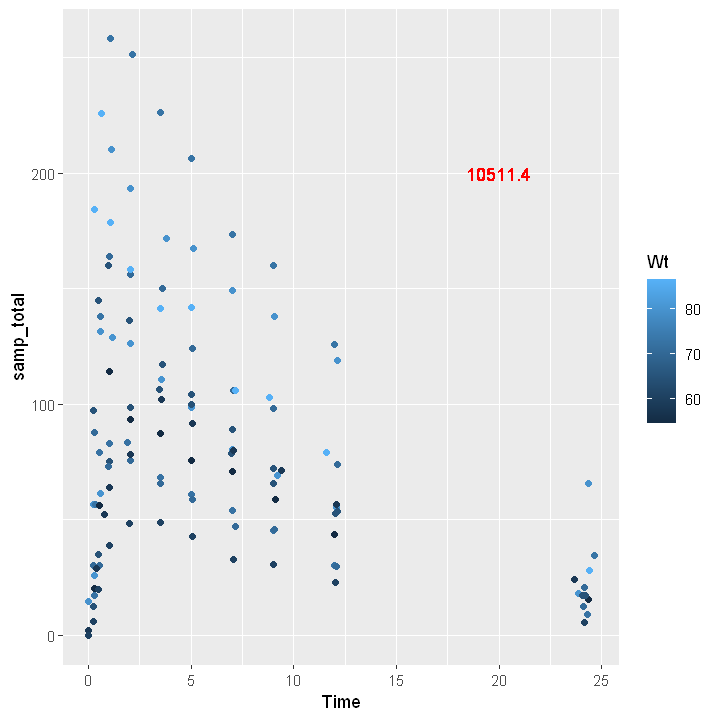

In [25]:
## KEY - DO NOT PROVIDE TO STUDENTS ##

# Fixed code
pt_sample <- read.table("./volume_data.txt", sep=',')
merged_theoph <- left_join(Theoph_ds, pt_sample, by="Subject")
merged_theoph <- merged_theoph %>% mutate(samp_total=conc*sample_volume)
total_drug <- sum(merged_theoph$samp_total)

ggplot(merged_theoph, aes(x=Time,y=samp_total,color=Wt)) +
    geom_point() +
    geom_text(aes(x=20, y=200, label=total_drug), color='red')


# Expected steps for students to take (in order), based on expected progression error messages and issues
# 1. Fix loading of the data frame (file is comma-separated, so need to add a separator to the first line)
# 2. Correct issue where the piping is done, but never assigned to a variable (assign output from third line to merged_theoph)
# 3. Fix the sum returning NA due to NA values in the dataframe from improper joining
    # (either swap the join order or inner join so only patients with data are joined  -OR-  add na.rm=TRUE in the sum on the fourth line [acceptable])
# 4. Fix geom_text aesthetic to include x and y for the positions in question (add x and y aesthetic to be at some point in the top right but not super far away from the data)